# Imports

In [1]:
from IPython.display import clear_output

In [2]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import active_learning as AL
import active_learning.query_strats as qs

In [4]:
%matplotlib inline

# Fetch data

In [5]:
digits = load_digits()

In [6]:
X = digits.images.reshape(-1, 64)
y = (digits.target == 2).astype(int)

# Model definition

In [7]:
base_clf = KNeighborsClassifier()

# Interactive oracle

In [8]:
def oracle(problem, train_ixs, obs_labels, selected_ixs, **kwargs):
    ix = selected_ixs[0]  # we'll only use 1 point per query
    points = problem['points']
    model = problem['model']
    clear_output(wait=True)
    plt.clf()
    plt.gray()
    plt.matshow(points[ix].reshape(8, 8))
    plt.show()
    label = int(input("Is this a 2? "))
    return np.array([label])

# Learning!

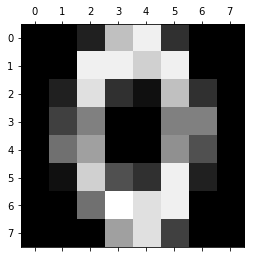

Is this a 2? 0


100%|██████████| 25/25 [00:45<00:00,  1.80s/it]


In [9]:
np.random.seed(seed=42)
interactive_exp_data = AL.utils.perform_experiment(
    X, y,
    base_estimator=base_clf,
    init_L_size=5, n_queries=25, batch_size=1, 
    oracle=oracle,
    shuffle=False
)

In [10]:
np.random.seed(seed=42)
random_exp_data = AL.utils.perform_experiment(
    X, y,
    base_estimator=base_clf,
    init_L_size=5, n_queries=25, batch_size=1,
    query_strat=qs.random_sampling,
    shuffle=False
)

100%|██████████| 25/25 [00:00<00:00, 353.60it/s]


# Plots

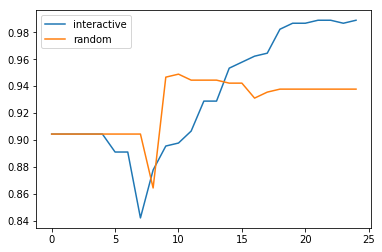

In [11]:
plt.plot(interactive_exp_data['accuracy'], label='interactive')
plt.plot(random_exp_data['accuracy'], label='random')
plt.legend()